### Association Rule Mining

In [73]:
library(arules)
library(arulesViz)

data <- read.transactions("data.csv",
                           rm.duplicates = FALSE, 
                           format = "basket",  
                           sep=",",  ## csv file
                           cols=1)
data

transactions in sparse format with
 35 transactions (rows) and
 10 items (columns)

In [74]:
data <- data[1:20]

### Transaction Data

In [75]:
inspect(data)

     items                                      transactionID  
[1]  {HEADPHONES, WALLET}                       SMARTPHONE_CASE
[2]  {CHAIR, SCREEN_CLEANER}                    SMARTPHONE_CASE
[3]  {HDMI_CABLE, KEYBOARD, SCREEN GUARD}       SCREEN_CLEANER 
[4]  {HDMI_CABLE, HEADPHONES}                   CHARGER        
[5]  {HDMI_CABLE, SMARTPHONE_CASE}              SMARTPHONE     
[6]  {HDMI_CABLE, HEADPHONES, SMARTPHONE_CASE}  CHARGER        
[7]  {HDMI_CABLE, KEYBOARD, SCREEN GUARD}       SCREEN_CLEANER 
[8]  {CHAIR, WALLET}                            SMARTPHONE_CASE
[9]  {CHAIR, SCREEN_CLEANER}                    SMARTPHONE_CASE
[10] {HEADPHONES, WALLET}                       SMARTPHONE_CASE
[11] {SCREEN GUARD, SCREEN_CLEANER, SMARTPHONE} HEADPHONES     
[12] {CHAIR, WALLET}                            SCREEN_CLEANER 
[13] {HEADPHONES, SCREEN GUARD}                 CHARGER        
[14] {CHAIR, SCREEN GUARD}                      SCREEN_CLEANER 
[15] {CHAIR, HDMI_CABLE}                

### Rules - Smartphone in the LHS

In [76]:
rules <- apriori(data=data,parameter = list(supp=.04, conf=.06, minlen=2),
                     appearance = list(default="rhs", lhs="SMARTPHONE"),
                     control=list(verbose=FALSE))

inspect(rules)                                               

    lhs             rhs               support confidence coverage lift     
[1] {SMARTPHONE} => {CHARGER}         0.05    0.25       0.2      2.5000000
[2] {SMARTPHONE} => {SCREEN_CLEANER}  0.05    0.25       0.2      1.2500000
[3] {SMARTPHONE} => {SMARTPHONE_CASE} 0.05    0.25       0.2      1.2500000
[4] {SMARTPHONE} => {SCREEN GUARD}    0.10    0.50       0.2      1.6666667
[5] {SMARTPHONE} => {HDMI_CABLE}      0.05    0.25       0.2      0.7142857
    count
[1] 1    
[2] 1    
[3] 1    
[4] 2    
[5] 1    


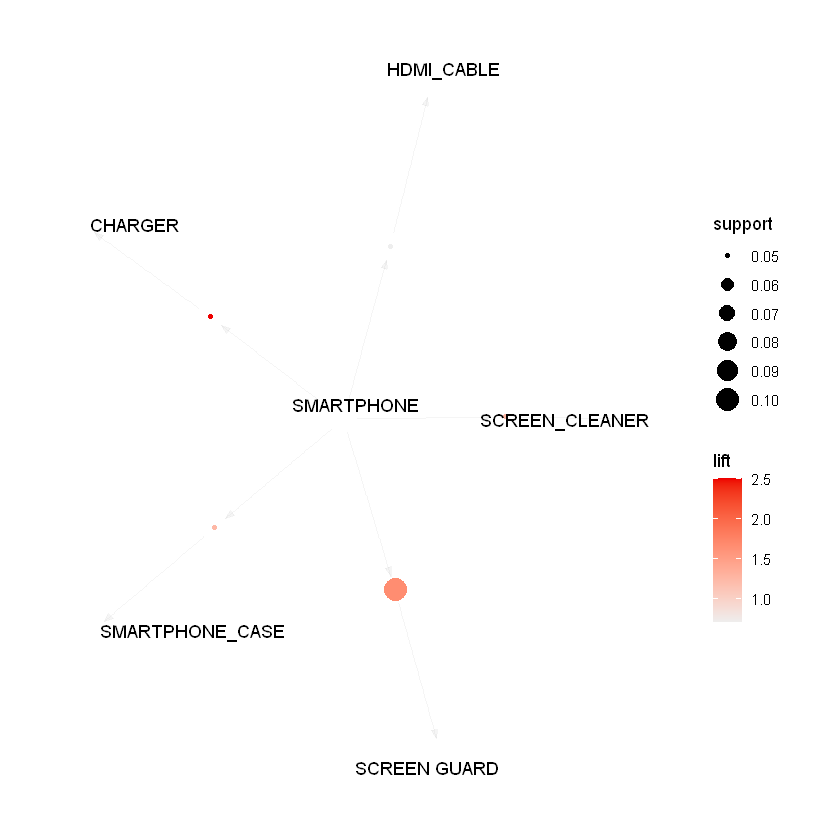

In [77]:
rules <- head(sort(rules, by="lift"))
plot(rules,method = "graph")  

#### Top 10 Rules by Confidence

In [78]:
conf_rules <- sort(rules, decreasing=TRUE, by="confidence")
inspect(conf_rules[1:5])     

    lhs             rhs               support confidence coverage lift     
[1] {SMARTPHONE} => {SCREEN GUARD}    0.10    0.50       0.2      1.6666667
[2] {SMARTPHONE} => {CHARGER}         0.05    0.25       0.2      2.5000000
[3] {SMARTPHONE} => {SCREEN_CLEANER}  0.05    0.25       0.2      1.2500000
[4] {SMARTPHONE} => {SMARTPHONE_CASE} 0.05    0.25       0.2      1.2500000
[5] {SMARTPHONE} => {HDMI_CABLE}      0.05    0.25       0.2      0.7142857
    count
[1] 2    
[2] 1    
[3] 1    
[4] 1    
[5] 1    


#### Top 10 Rules by Lift

In [79]:
lift_rules <- sort(rules, decreasing=TRUE, by="lift")
inspect(lift_rules[1:5])     

    lhs             rhs               support confidence coverage lift     
[1] {SMARTPHONE} => {CHARGER}         0.05    0.25       0.2      2.5000000
[2] {SMARTPHONE} => {SCREEN GUARD}    0.10    0.50       0.2      1.6666667
[3] {SMARTPHONE} => {SCREEN_CLEANER}  0.05    0.25       0.2      1.2500000
[4] {SMARTPHONE} => {SMARTPHONE_CASE} 0.05    0.25       0.2      1.2500000
[5] {SMARTPHONE} => {HDMI_CABLE}      0.05    0.25       0.2      0.7142857
    count
[1] 1    
[2] 2    
[3] 1    
[4] 1    
[5] 1    


#### Top 10 Rules by Support

In [80]:
supp_rules <- sort(rules, decreasing=TRUE, by="support")
inspect(supp_rules[1:5])     

    lhs             rhs               support confidence coverage lift     
[1] {SMARTPHONE} => {SCREEN GUARD}    0.10    0.50       0.2      1.6666667
[2] {SMARTPHONE} => {CHARGER}         0.05    0.25       0.2      2.5000000
[3] {SMARTPHONE} => {SCREEN_CLEANER}  0.05    0.25       0.2      1.2500000
[4] {SMARTPHONE} => {SMARTPHONE_CASE} 0.05    0.25       0.2      1.2500000
[5] {SMARTPHONE} => {HDMI_CABLE}      0.05    0.25       0.2      0.7142857
    count
[1] 2    
[2] 1    
[3] 1    
[4] 1    
[5] 1    


### Association Rules - Headphones in the LHS


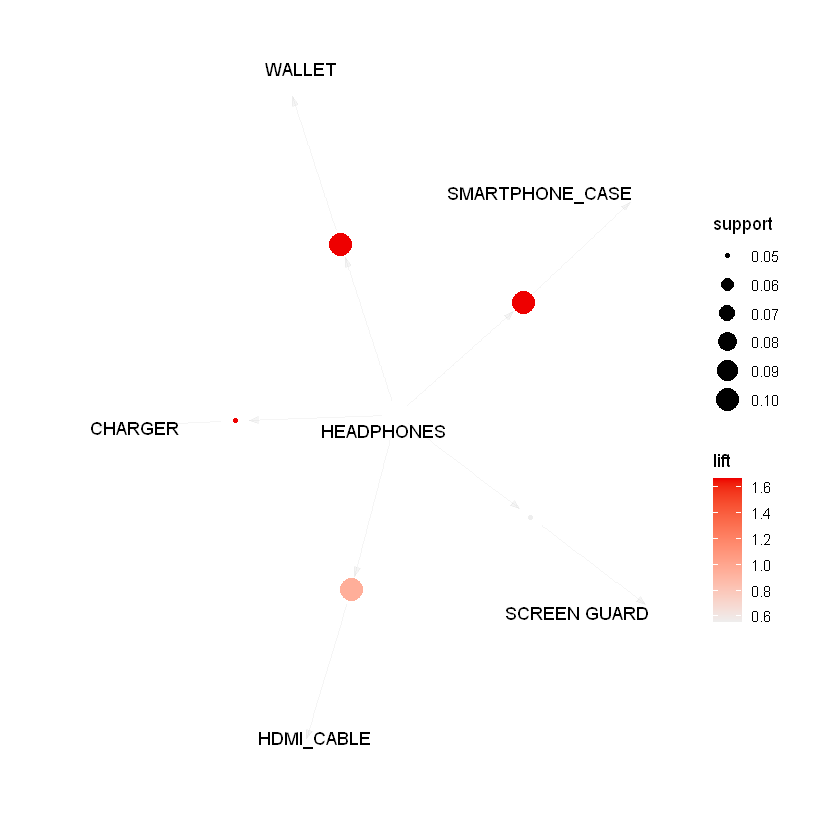

In [81]:
rules <- apriori(data=data,parameter = list(supp=.04, conf=.05, minlen=2),
                     appearance = list(default="rhs", lhs="HEADPHONES"),
                     control=list(verbose=FALSE))
subrules <- head(sort(rules, by="lift"))
plot(subrules,method = "graph")                                            